In [1]:
from math import inf
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [8]:
class Connection:
    def __init__(self, node, dist):
        self.node = node
        self.dist = dist


class Node:

    def __init__(self, name, x, y):
      self.name = name
      self.distance = inf
      self.heuristic = 0
      self.neighbours = []
      self.prev = None
      self.visited = False
      self.x = x
      self.y = y

    def add_neighbour(self, new_node, dist):
        connection = Connection(new_node, dist)
        self.neighbours.append(connection)




A = Node("A", 6, 5)
B = Node("B", 4, 4)
C = Node("C", 3, 1)
D = Node("D", 5, 2)
E = Node("E", 1, 2.5)
F = Node("F", 3, -2)
G = Node("G", 0, 0)

H = Node("H", -1.5, 2)

A.add_neighbour(B, 6)
A.add_neighbour(D, 1)

B.add_neighbour(A, 6)
B.add_neighbour(E, 1)
B.add_neighbour(C, 2)

C.add_neighbour(B, 2)
C.add_neighbour(D, 1)

D.add_neighbour(C, 1)
D.add_neighbour(A, 1)
D.add_neighbour(F, 2)

E.add_neighbour(B, 1)
E.add_neighbour(F, 6)
E.add_neighbour(G, 3)

F.add_neighbour(D, 2)
F.add_neighbour(E, 6)
F.add_neighbour(G, 10)

G.add_neighbour(F, 10)
G.add_neighbour(E, 3)

A.add_neighbour(H, 4)
G.add_neighbour(H, 1)

nodes = [A, B, C, D, E, F, G, H]

No handles with labels found to put in legend.


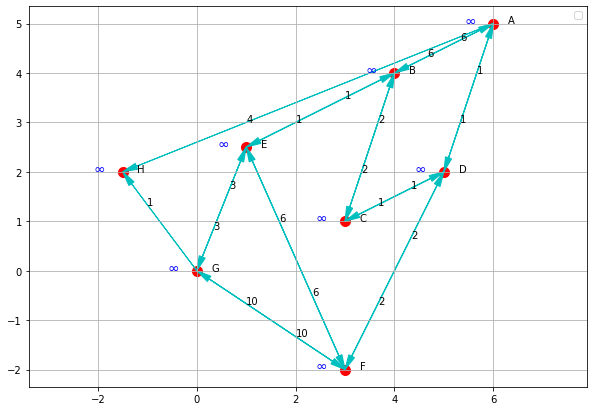

In [12]:
def plot_state(current = None, neigh = None, state=0):
    # state 1 highlights neigh and state 2 highlights the distance
    plt.figure(figsize=(10,7))
    for node in nodes:
        if node == current:
            plt.scatter(node.x, node.y, s=100, c="g", label = "current: "+current.name)
        else:
            plt.scatter(node.x, node.y, s=100, c="r")
        plt.text(node.x+0.3, node.y, node.name)

        if node.distance != inf:
            if node == neigh and state == 2:
                plt.text(node.x-0.5, node.y, node.distance, color = "g", fontsize="14")
            else:
                plt.text(node.x-0.3, node.y, node.distance, color = "b")
        else: 
            plt.text(node.x-0.6, node.y, "$\infty$", color = "b", fontsize="14")
        #if node.prev:
         #   plt.text(node.x-0.6, node.y-0.4, node.prev.name, color = "b")

        for conn in node.neighbours:
            if not(node == current and conn.node == neigh):
                plt.arrow(node.x, node.y, (conn.node.x-node.x), (conn.node.y-node.y), color="c", head_width=0.13, head_length=0.3, length_includes_head=True)
            plt.text((node.x + 2*conn.node.x)/3, (node.y + 2*conn.node.y)/3, str(conn.dist))

    if neigh is not None:
        plt.arrow(current.x, current.y, (neigh.x-current.x), (neigh.y-current.y), color="y", head_width=0.13, head_length=0.3, length_includes_head=True, linewidth=3)

    plt.axis("equal")
    plt.legend()
    plt.grid()
    plt.show()

plot_state()

In [13]:
def plot_path(path):
    plt.figure(figsize=(10,7))
    path_dict={}
    for i, node in enumerate(path[:-1]):
        path_dict[node.name] = path[i+1]

    for node in nodes:

        plt.scatter(node.x, node.y, s=100, c="r")
        plt.text(node.x+0.3, node.y, node.name)

        if node.distance != inf:
            if node == path[-1]:
              plt.text(node.x-0.5, node.y, node.distance, color = "g", fontsize="14")
            else:
              plt.text(node.x-0.3, node.y, node.distance, color = "b")

        else: 
            plt.text(node.x-0.6, node.y, "$\infty$", color = "b", fontsize="14")

        for conn in node.neighbours:
            if node in path[:-1]:
                if path_dict[node.name] == conn.node:
                    pass
                else:
                    plt.arrow(node.x, node.y, (conn.node.x-node.x), (conn.node.y-node.y), color="c", head_width=0.13, head_length=0.3, length_includes_head=True)
            else:
                plt.arrow(node.x, node.y, (conn.node.x-node.x), (conn.node.y-node.y), color="c", head_width=0.13, head_length=0.3, length_includes_head=True)
            plt.text((node.x + 2*conn.node.x)/3, (node.y + 2*conn.node.y)/3, str(conn.dist))



        # Repeated to ensure the yellow arrows are on top, and not the cyan ones
    for node in nodes:
        for conn in node.neighbours:
            if node in path[:-1]:
                if path_dict[node.name] == conn.node:
                    plt.arrow(node.x, node.y, (conn.node.x-node.x), (conn.node.y-node.y), color="y", head_width=0.13, head_length=0.3, length_includes_head=True, linewidth=3)


        

    plt.axis("equal")
    plt.grid()
    plt.show()

In [14]:
def generate_heuristics(end):

    for node in nodes:
        if node == end:
            node.heuristic = 0
        else:
            node.heuristic = ((node.x-end.x)**2+(node.y-end.y))**(1/2)

def set_problem(start, end):
    for node in nodes:
        node.distance = inf
        node.prev = start
        node.visited = False
    generate_heuristics(end)
    start.distance = 0
    start.prev = None
    return start, end

In [15]:
def new_current():
    min_distance = inf
    for node in nodes:
        if not node.visited:
          if node.distance + node.heuristic <= min_distance:
              min_distance = node.distance + node.heuristic
              new_node = node
    return new_node


In [19]:
start, end = set_problem(A, G)
current=start
#C.heuristic = 7

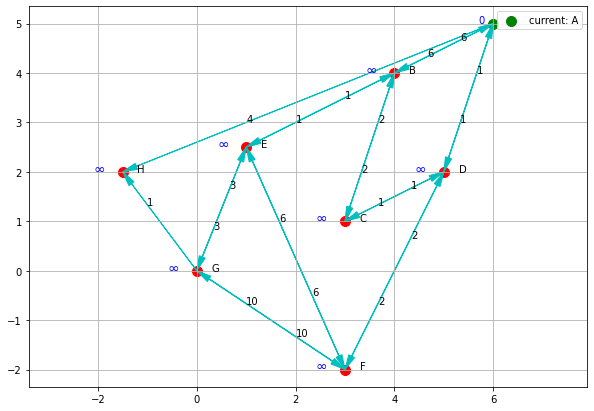

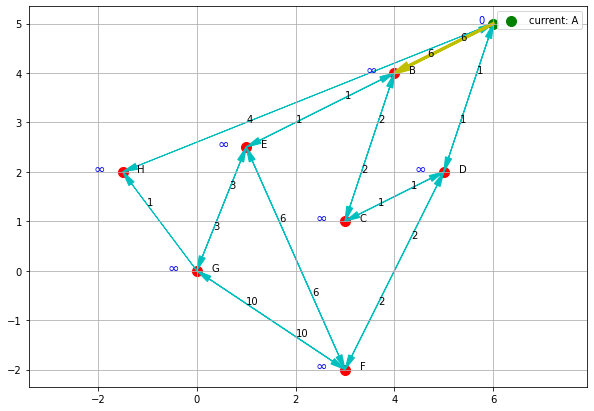

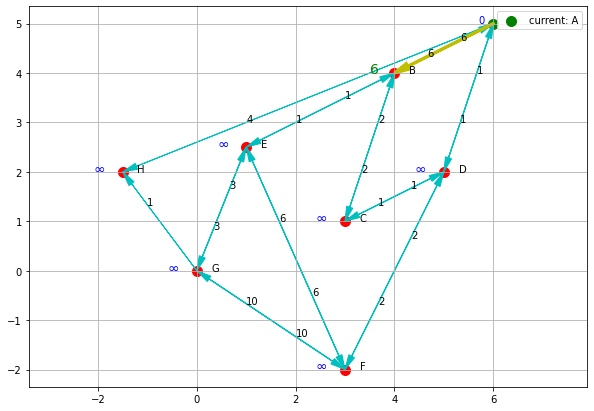

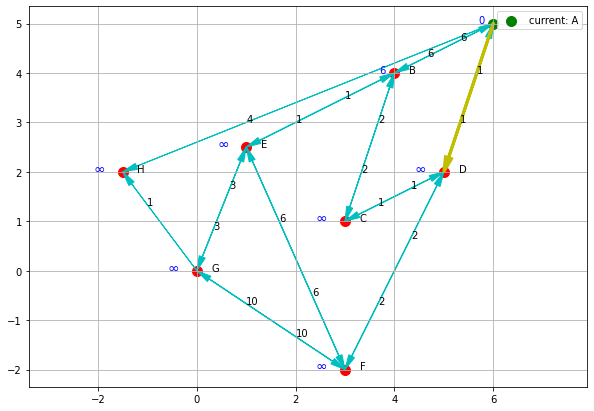

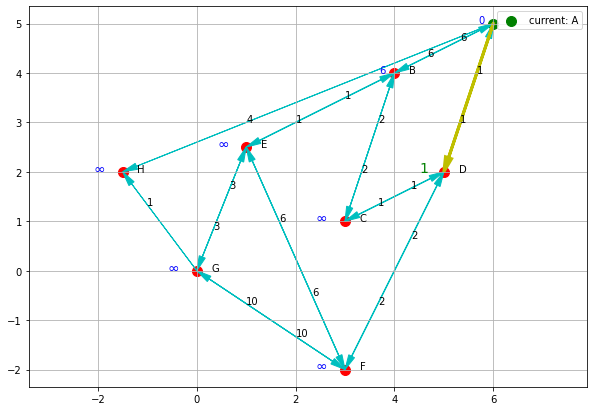

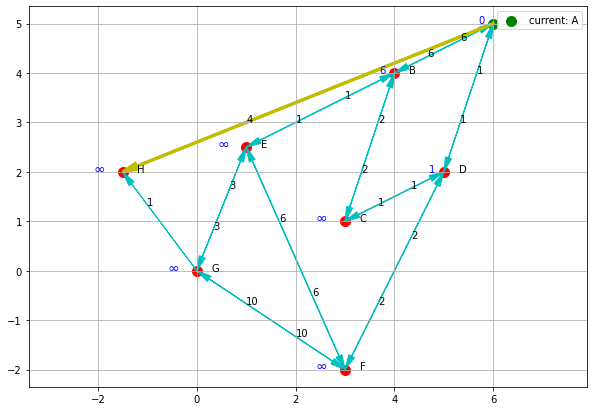

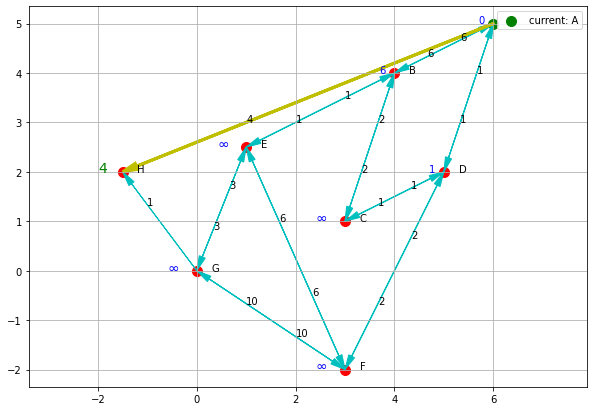

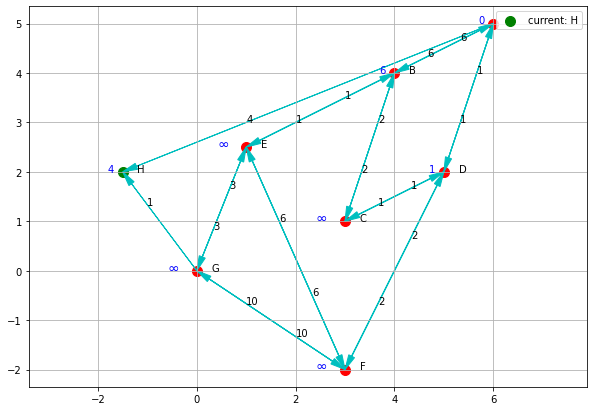

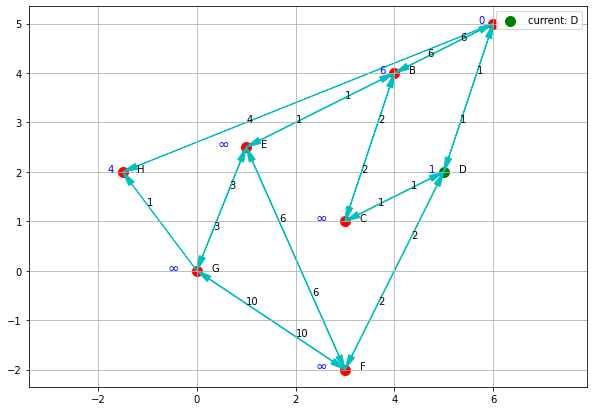

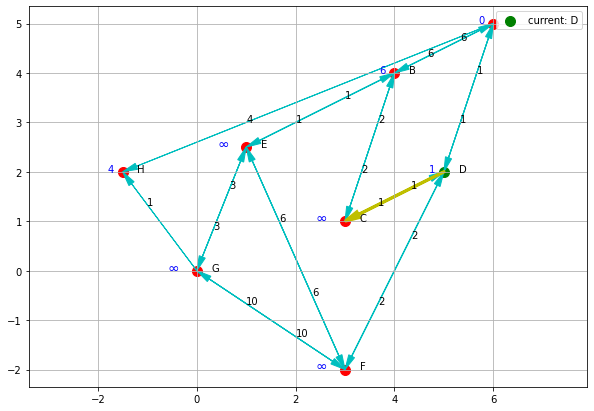

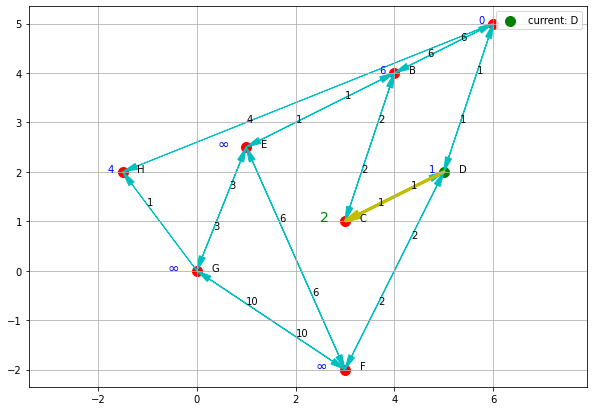

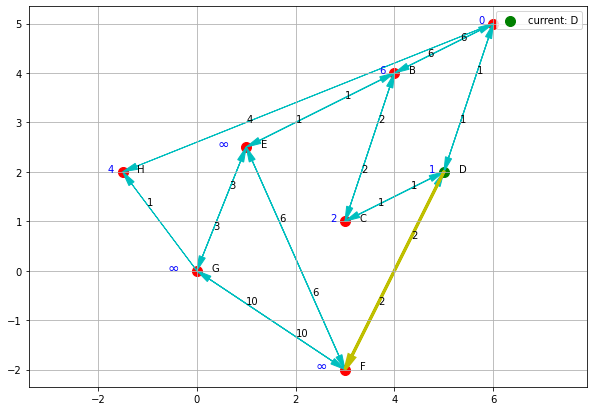

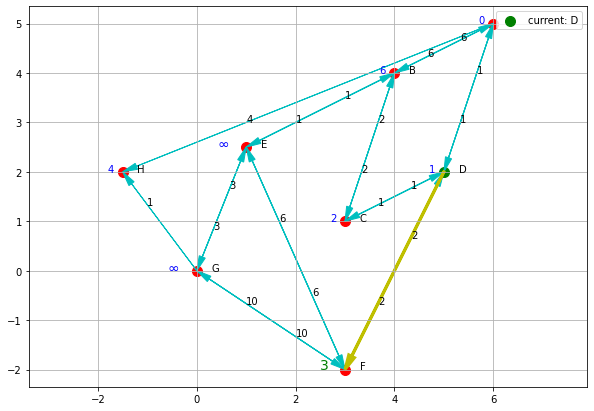

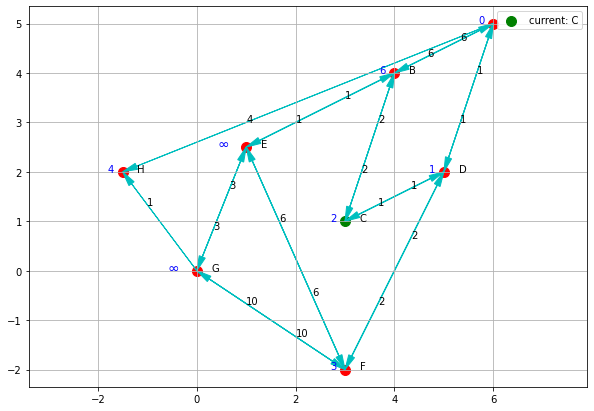

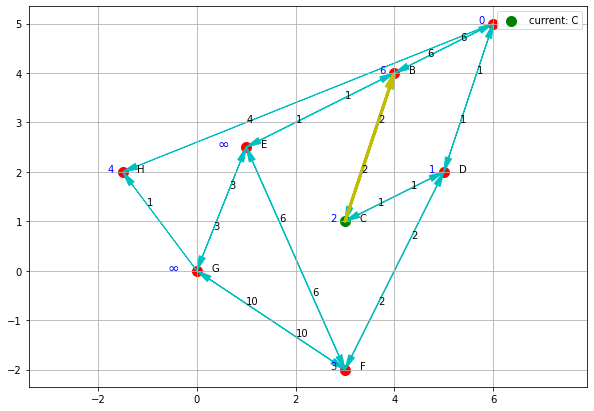

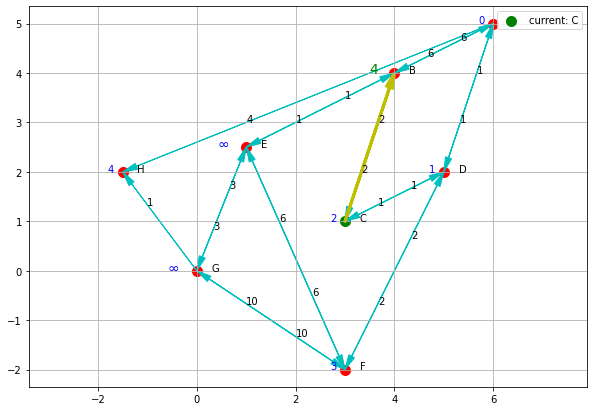

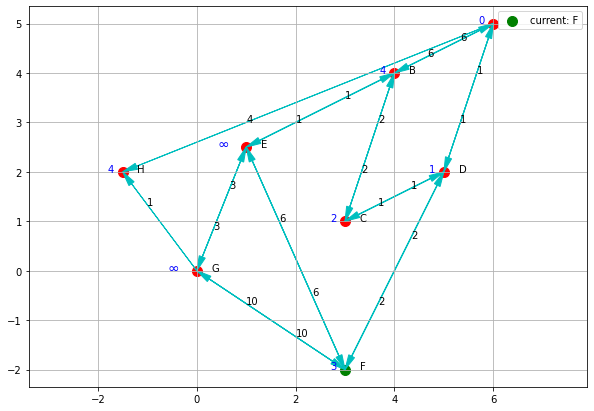

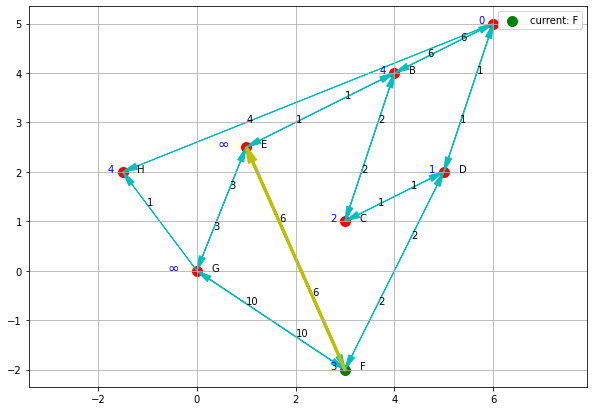

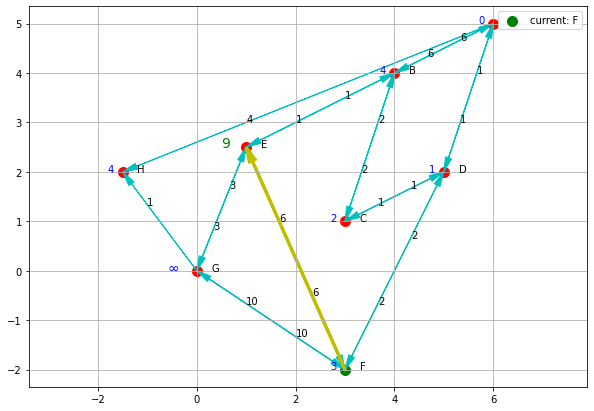

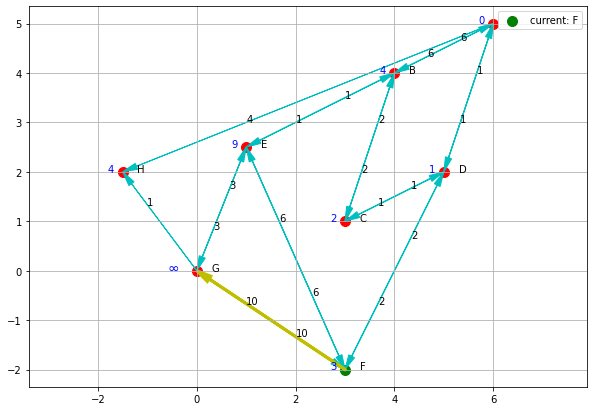

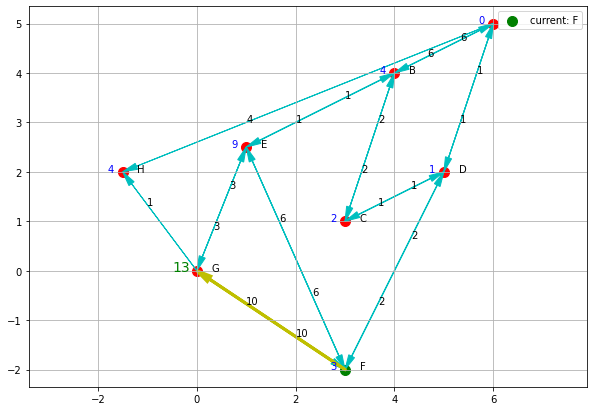

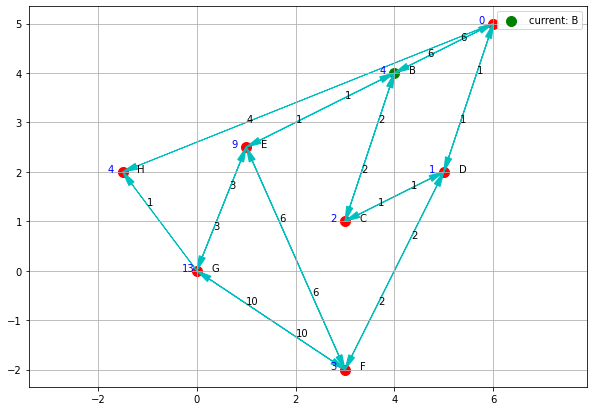

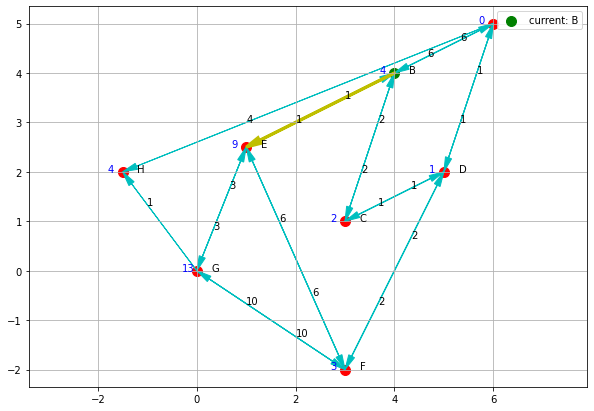

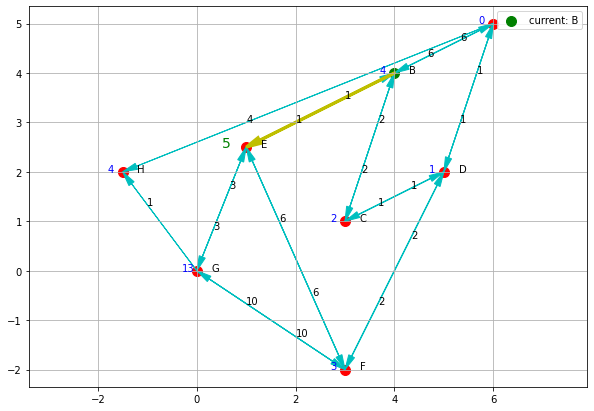

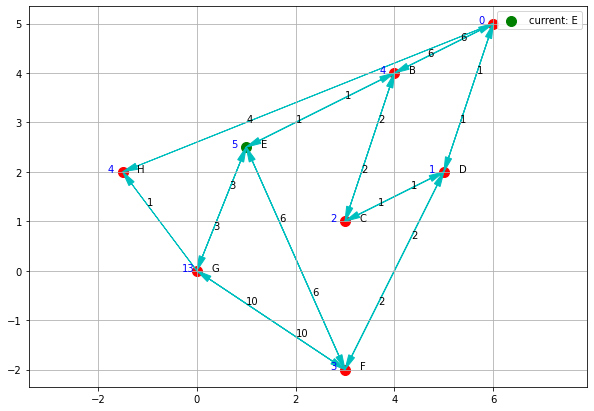

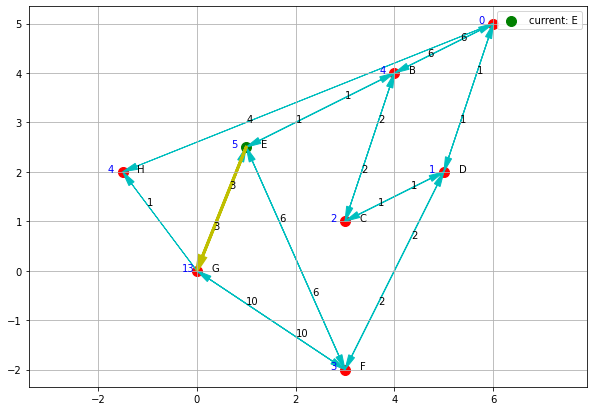

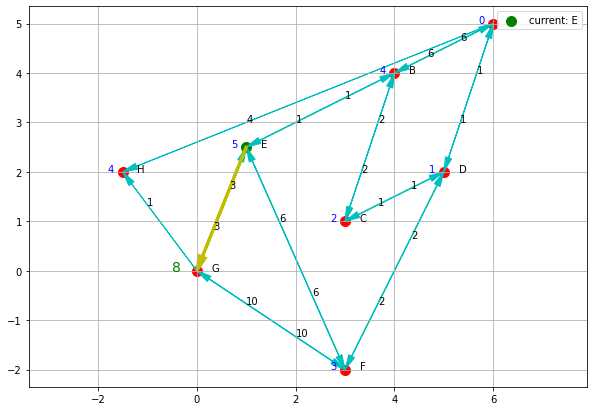

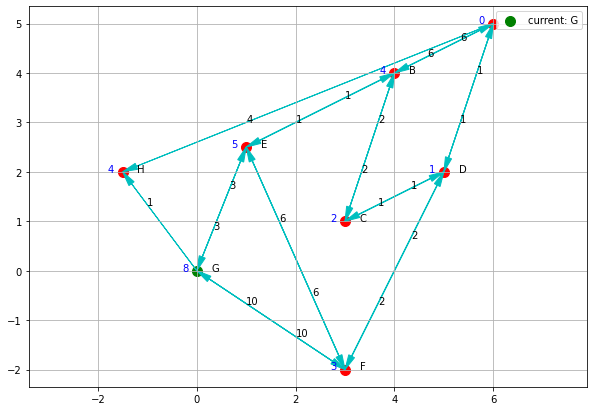

In [20]:
while current != end:
    #print("current:", current.name)
    plot_state(current = current)
    for neighbour in current.neighbours:
        if not neighbour.node.visited:
            plot_state(current, neighbour.node, 1)
            if current.distance + neighbour.dist <= neighbour.node.distance:
                neighbour.node.distance = current.distance + neighbour.dist
                neighbour.node.prev = current
                plot_state(current, neighbour.node, 2)
    current.visited = True

    current = new_current()
    
plot_state(current = current)


In [21]:
print(current.distance)
path = []
while current != start:
    path.append(current)
    current = current.prev
    
path.append(current)
path.reverse()
for node in path:
    print(node.name, end = " ")



8
A D C B E G 

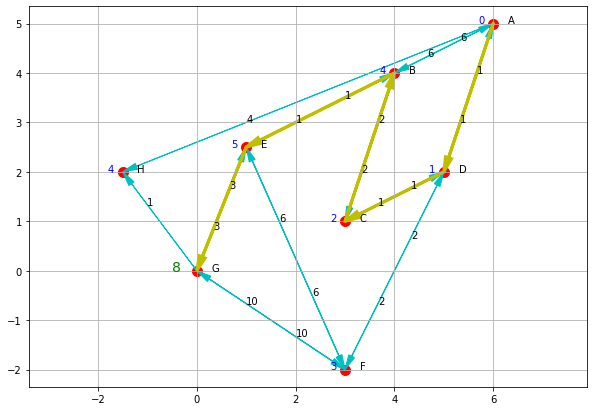

In [22]:
plot_path(path)